## Import Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
df = pd.read_csv("heart-failure-prediction.csv")

### Dataset Description

##### Age : Age of a patient [years]
##### Sex : Gender of the patient [M: Male, F: Female]
##### ChestPain : Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
##### RestingBP	: Blood pressure in Hg (Normal blood pressure - 120/80 Hg)
##### Cholesterol : Serum cholestrol level in blood (Normal cholesterol level below for adults 200mg/dL)
##### FastingBS : Fasting Blood Sugar (Normal less than 100mg/dL for non diabetes for diabetes 100-125mg/dL)
##### RestingECG : Rresting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or 
#####               depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
##### MaxHR : Maximum Heart Rate achieved [Numeric value between 60 and 202]
##### ExerciseAngina : Exercise-induced angina [Y: Yes, N: No]
##### Oldpeak : Oldpeak = ST [Numeric value measured in depression]
##### ST_Slope : The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
##### HeartDisease : Output class [1: heart disease, 0: Normal]

### Reading sample data

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(918, 12)

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Checking if we have any missing values

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Null heatmap

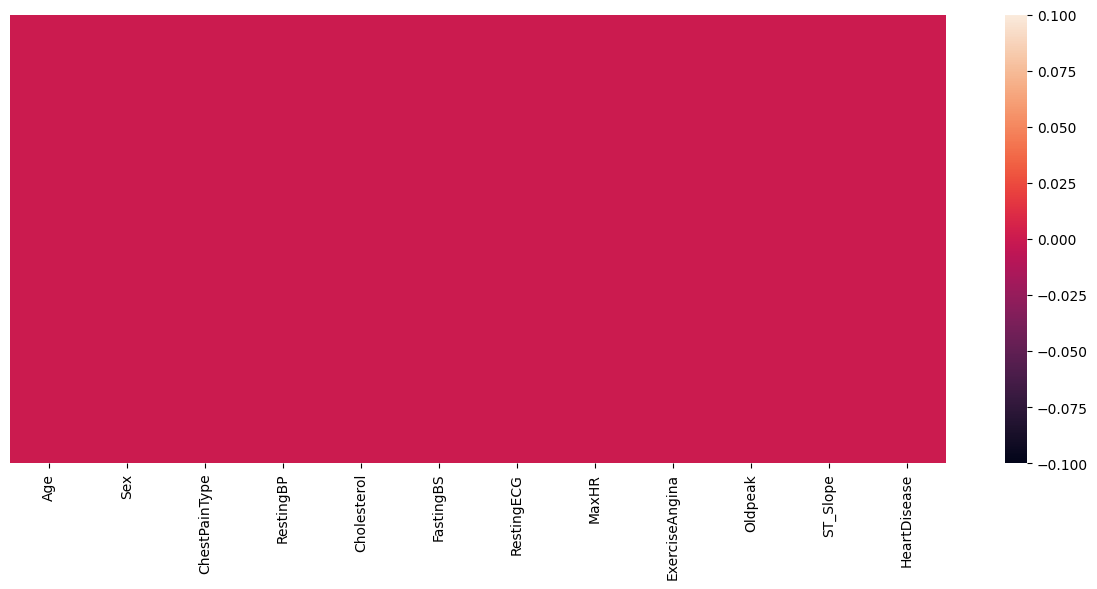

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [11]:
# check repeated rows

df.duplicated().sum()

0

### Number of unique values for all columns:

In [12]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [13]:
#target column
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [14]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

### Distribution of Heart-Disease (target column)

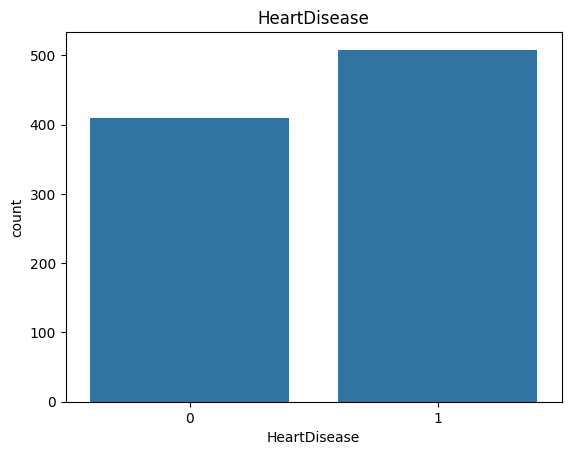

In [15]:
sns.countplot(x=df['HeartDisease'])
plt.title('HeartDisease');

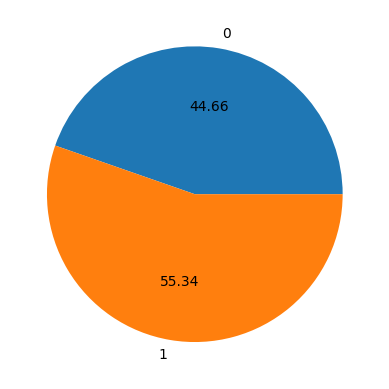

In [16]:
plt.pie(df.groupby(by=["HeartDisease"]).size(), labels = df["HeartDisease"].unique(), autopct = "%0.2f")
plt.show()


In [17]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

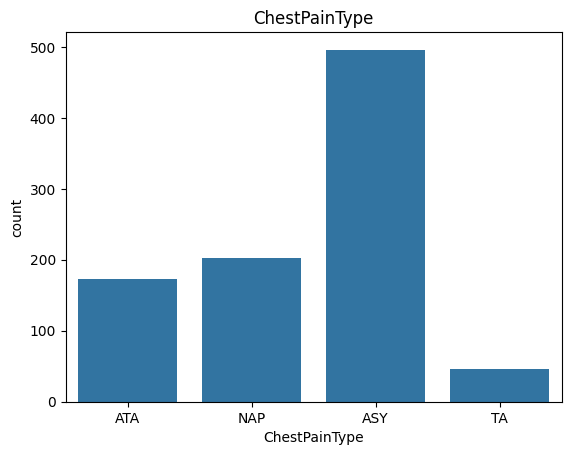

In [18]:
sns.countplot(x=df['ChestPainType'])
plt.title('ChestPainType');

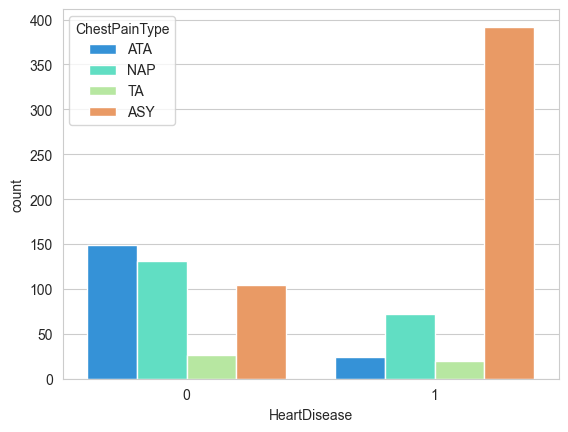

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',hue='ChestPainType',data=df,palette='rainbow')
plt.show()

In [20]:
df['Sex']. value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

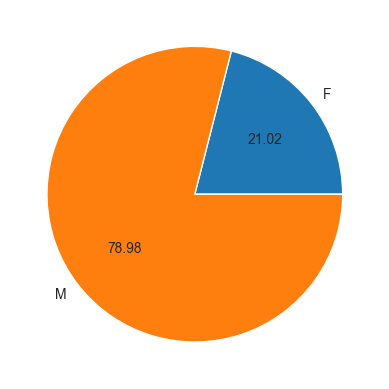

In [21]:
plt.pie(df.groupby(by=["Sex"]).size(), labels = ["F", "M"], autopct = "%0.2f")
plt.show()

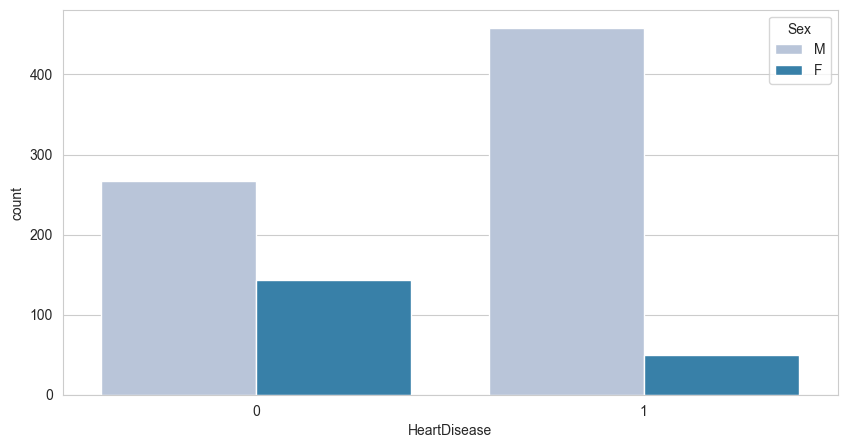

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='HeartDisease', palette="PuBu", hue='Sex')
plt.show()

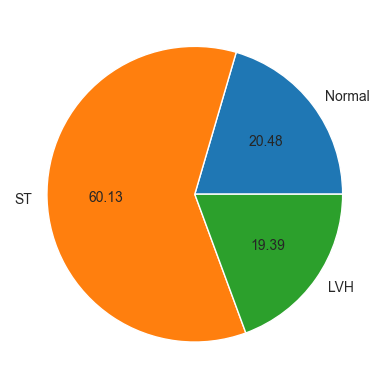

In [23]:
plt.pie(df.groupby(by=["RestingECG"]).size(), labels = df["RestingECG"].unique(), autopct = "%0.2f")
plt.show()

### Show value counts for the columns:

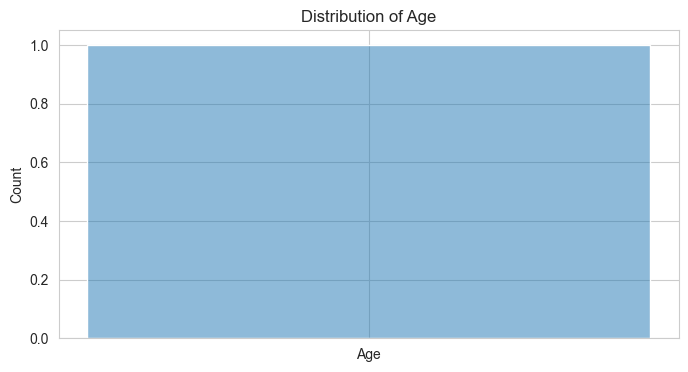

Counts for Age:
Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64


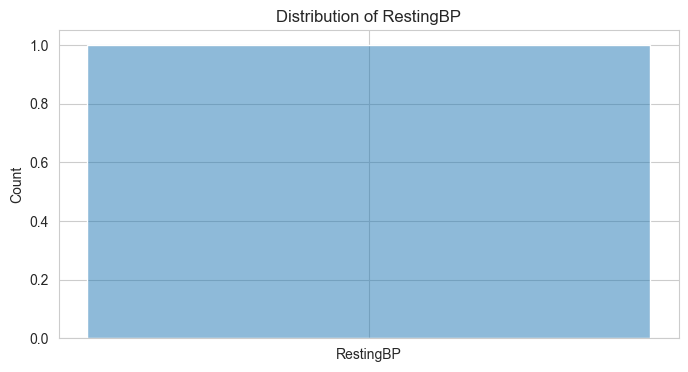

Counts for RestingBP:
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: count, Length: 67, dtype: int64


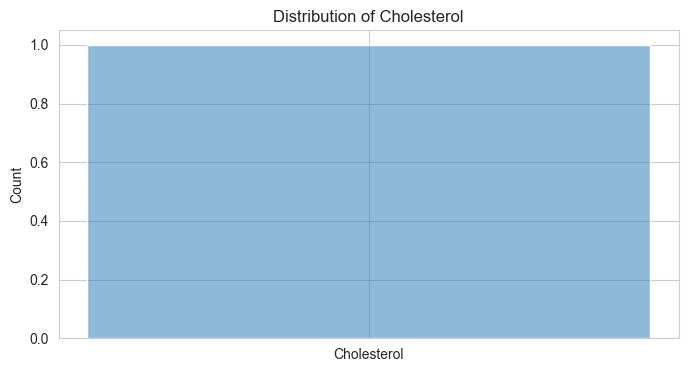

Counts for Cholesterol:
Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64


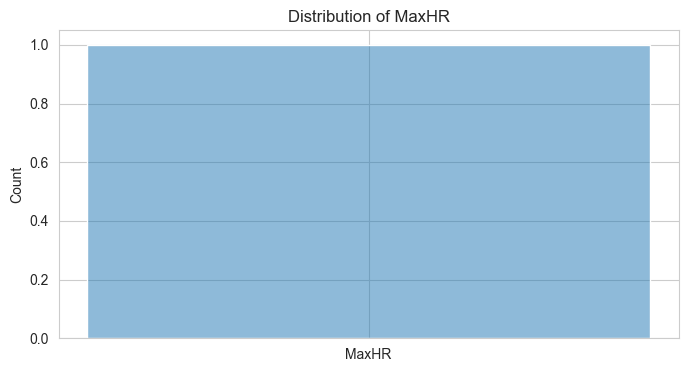

Counts for MaxHR:
MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64


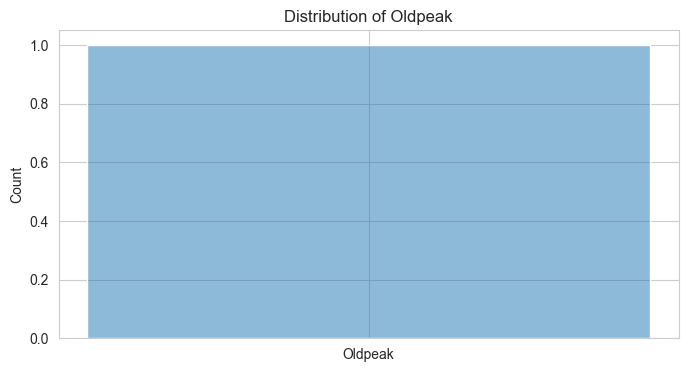

Counts for Oldpeak:
Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64


In [24]:
numerical_useful = [ 'Age', 'RestingBP', 'Cholesterol','MaxHR', 'Oldpeak']
    
    
for col in numerical_useful:
    d_type = df[col].dtype
    
    if d_type != "object" and (df[col] > 1).any().any():
        plt.figure(figsize=(8, 4))
        sns.histplot([col], bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        #plt.xlabel(f'{col}')
        plt.show()
    
    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

### Distribution of the numerical columns

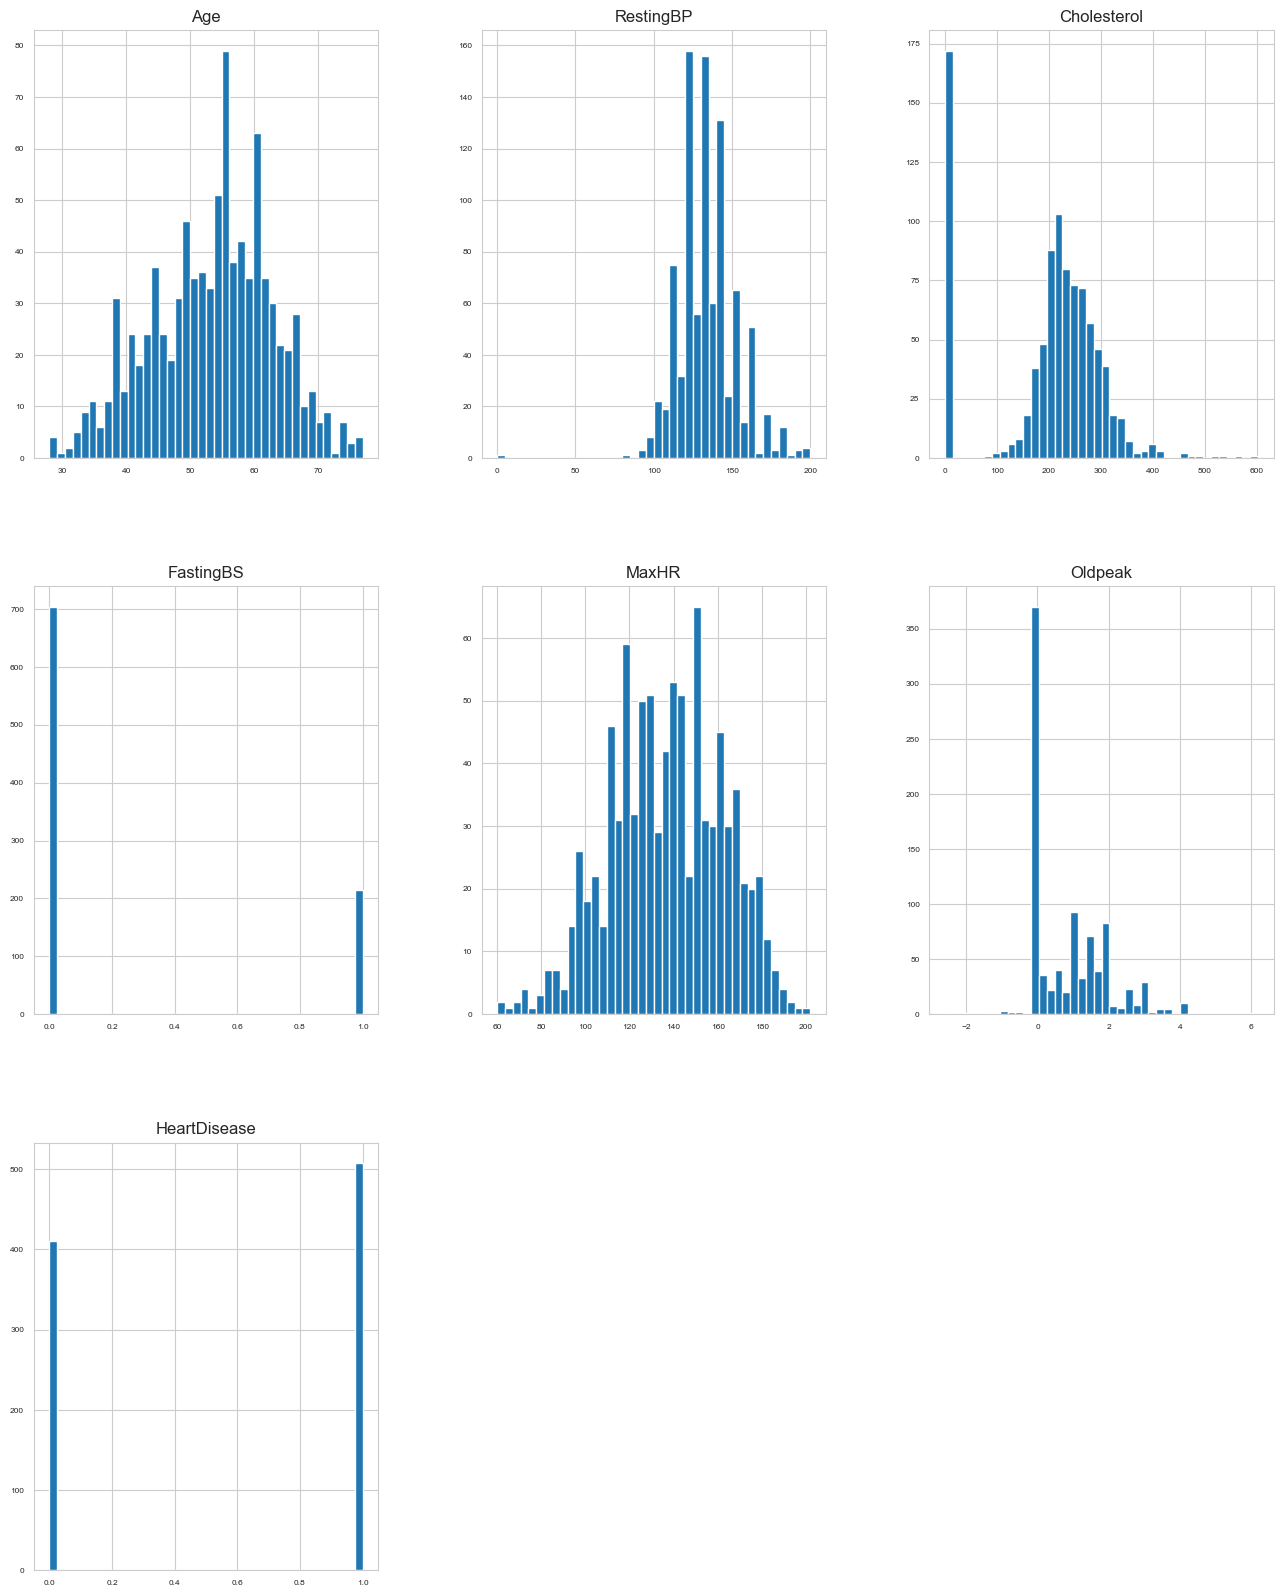

In [25]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

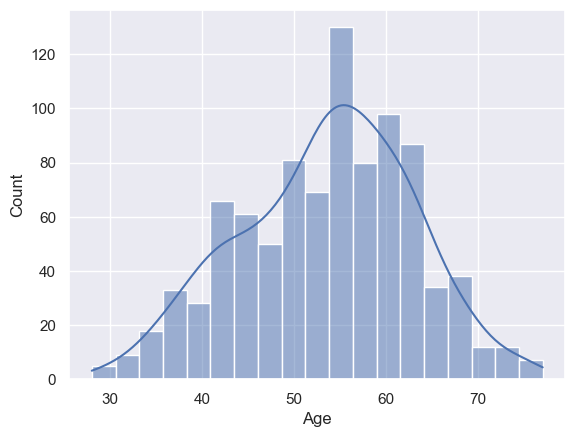

In [26]:
#distribution of age
sns.set_theme()
sns.histplot(data = df, x = "Age", kde = True)
plt.show()

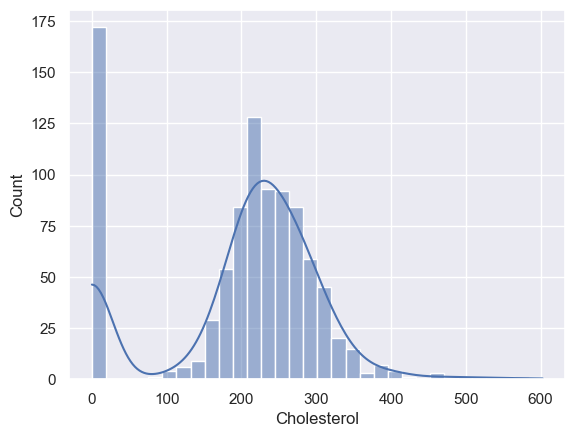

In [27]:
#distribution of Cholesterol
sns.histplot(data = df, x = "Cholesterol", kde = True)
plt.show()

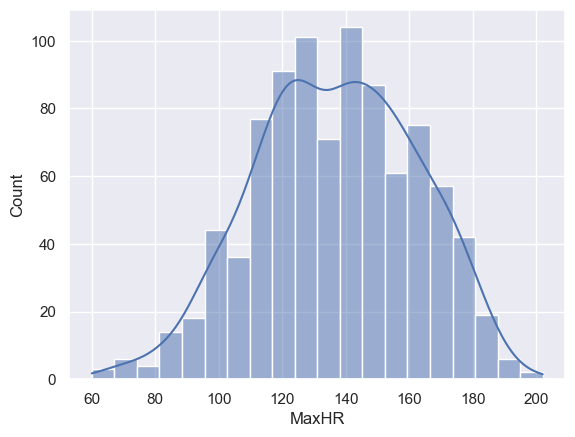

In [28]:
#distribution of MaxHR
sns.histplot(data = df, x ="MaxHR", kde = True)
plt.show()

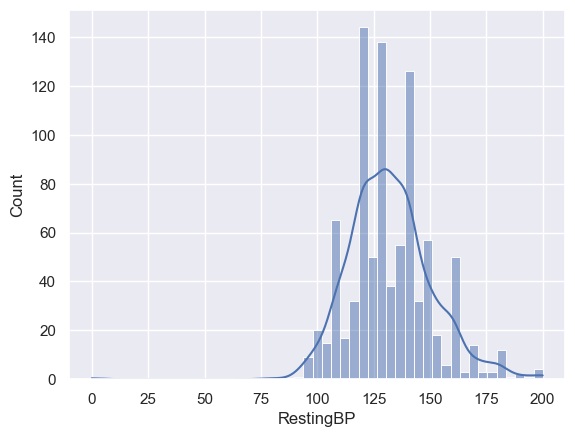

In [29]:
#distribution of RestingBP
sns.histplot(data = df, x = "RestingBP", kde = True)
plt.show()

In [30]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [31]:
X=pd.get_dummies(X,dtype=float,drop_first=True)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54,150,195,0,122,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
916,57,130,236,0,174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [33]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [34]:
RF_model.score(X_train , y_train)

1.0

In [35]:
RF_pred = RF_model.predict(X_test)

In [36]:
accuracy_score(y_test , RF_pred)

0.8840579710144928

In [37]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       112
           1       0.90      0.90      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



Text(92.25, 0.5, 'Truh')

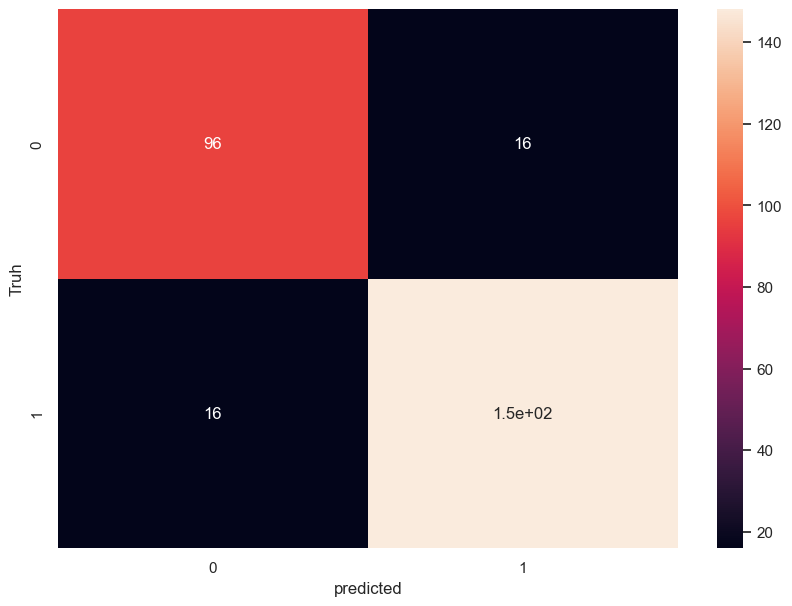

In [38]:
cm1 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [39]:
svc = svm.SVC(kernel='linear', random_state = 2)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=2)

In [40]:
svc.score(X_train , y_train)

0.8629283489096573

In [41]:
svc_pred = svc.predict(X_test)

In [42]:
 accuracy_score(y_test , svc_pred)

0.8731884057971014

In [43]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.92      0.86      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276



Text(92.25, 0.5, 'Truh')

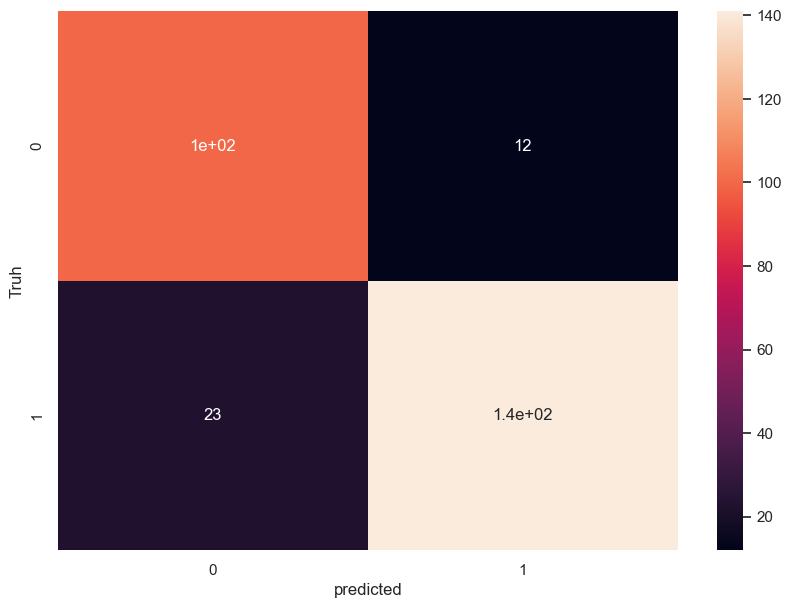

In [44]:
cm2 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')